# Week 9: Networks 1


A network is a way to represent a system of things that interact or are interrelated in some fashion. It could just be your facebook network, that's obvious, but a network can also represent the interaction patterns of proteins in the human body, who votes what on whose bill in the US Senate, the mutually attractive forces between galaxies in the universe or just about anything else that you can possibly imagine. This week we will get started on some of the fundamental concepts, and then look closer at some Facebook data. In the exercises today you will:

* Get warmed up to thinking about systems as networks
* Learn to use the `NetworkX` library
* Explore a Facebook network

# Lecture

In [3]:
# ----------------- !
# Execute this cell !
# ----------------- !

from IPython.display import HTML

def video_html(url):
    return f"""
    <div align="middle">
    <video width="50%" controls>
      <source src="{url}" type="video/mp4">
    </video></div>"""

HTML(video_html('https://www.dropbox.com/s/43ya0a9jmaa6exk/slides_week9_mov.m4v?raw=1'))

## Imports

In [22]:
%matplotlib inline
import matplotlib.pylab as plt
import networkx as nx           # pip install networkx
import pandas as pd
from collections import Counter
from netwulf import visualize   # pip install netwulf

## Exercises

### Part 0: Networks

Questions for chapter 1 and 2 of [Network Science](http://barabasi.com/networksciencebook/).

> **Ex. 9.0.1**: List three different real networks and state the nodes and links for each of them.

### Three different real networks

1: Citation in academic papers. The nodes are the academic papers, the links are the reference to other papers.

2: The body. The celles are the nodes and the links are the relationsship between the cells.

3: Facebook. The nodes are people, the links are friendsships with other people.

> **Ex. 9.0.2**: What networks are you personally most interested in. Address the following questions:
>   * What are its nodes and links? 
>   * How large is it? 
>   * Can be mapped out? 
>   * Why do you care about it? 

### Personal interest:  Social networks

I have an interest in social networks, not just the online ones, but communities, business networks or families. The nodes are people and their links are the type of relationships that they have. At the largest, it includes everybody in the entire world, but mostly smaller subpopulations have my interest.
For instance the most powerful people in Denmark and how they're connected to each other. This includes the economic elite and the elected officials and other major players in politics in Denmark. It can be mapped out in some extent. All board members are public in Denmark, but it can be tedious work. Private relationsships are harder to map, but are equally important.
The reason why I believe it is important is that it increases transparency of how decisions are made. Transparency is important in order for a democray.

> **Ex. 9.0.3**: In your view what would be the area where network science could have the biggest impact in the next decade? Explain your answer - and base it on the text in the book. 

## Future impacts of networks science

It is a very complex question, that I do not believe that I am fully qualified to answer.
So far, network science has had great impact in a lot of different research field in both nature sciences and social sciences. The book mentions medicine and pharmacies as a promising field, And I agree with this view. It has a great potential to create at better understanding of how medicine affects the entire system, and find new solutions.
Furthermore, I believe that network science can have a big effect on field of economics. In how we understand different markets, but I believe that it can also give new insights in the behavouir of individuals.

> **Ex. 9.0.4**: Section 2.5 states that real networks are sparse. Can you think of a real network where each node has *many* connections? Is that network still sparse? If yes, can you explain why?

### Sparse networks

A networks with many connections could be the power grid, and yet it is still sparse. The reason for this is that the actual connections (L) between nodes are still smaller than the theoretical possiblity of connections (L_max)

### Part 1: The `NetworkX` library

`NetworkX` is the Python library we will be using for working with networks. It should come installed with your Anaconda distribution, but you wont know how to use it yet. The best way to get familiar is to work through a tutorial. That's what the following exercises are about.

> **Ex. 9.1.1**: Go to the `NetworkX` project's [tutorial page](https://networkx.github.io/documentation/stable/tutorial.html). Read the first few sections about nodes, edges and attributes. Write an example below where you create a graph, `G`, and then:
1. add some nodes and edges to,
2. print its nodes and edges
3. delete a node, and
4. plot it.

List of Gs nodes: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
List of Gs edges: [(0, 1), (1, 2), (2, 3), (3, 4), (4, 5), (5, 6), (6, 7), (7, 8), (8, 9)]


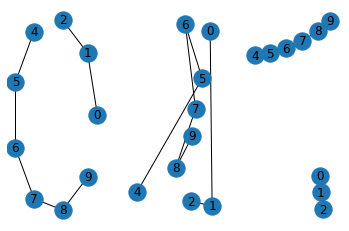

In [5]:
import networkx as nx
G = nx.Graph()

#adding notes
H = nx.path_graph(10)
G.add_nodes_from(H)
#G.add_node(H)


#adding edges
G.add_edges_from(H.edges)


#printing list of G's nodes
print('List of Gs nodes:',list(G.nodes))
print('List of Gs edges:',list(G.edges))

#Deleting a node:
G.remove_node(3)

#plotting it different ways:
import matplotlib.pyplot as plt
plt.subplot(131)
nx.draw_shell(G, with_labels=True)

plt.subplot(132)
nx.draw_random(G, with_labels=True)

plt.subplot(133)
nx.draw(G, with_labels=True)


> **Ex. 9.1.2**: `NetworkX` has lots of functions to generate synthetic networks. One of the most famous types of synthetic networks is called an Erdős–Rényi (ER) network.
1. Describe what an ER network is and how to create one.
2. On the [`NetworkX` documentations site](https://networkx.github.io/documentation/networkx-1.10/reference/generators.html), find a method you can use for generating an ER network. Create one with $N=100$ nodes and probability of edge creation $p=0.1$.
3. Plot the network
4. Visualize the [degree distribution](https://en.wikipedia.org/wiki/Degree_distribution) of your newly created ER graph.
    * A node's *degree* is the number of other nodes it is connected to.
    * The *degree distribution* is a histogram which shows the distribution of node degrees.

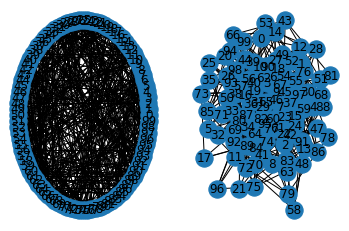

In [6]:
#A Erdős–Rényi (ER) network is a random network. A random network is a network of nodes (N), where the chance of the nodes
#being connected is determined by a probability (p).

#creating a random network
from networkx import erdos_renyi_graph

ER = erdos_renyi_graph(100, 0.1)

#plotting the network
plt.subplot(121)
nx.draw_shell(ER, with_labels=True)
plt.subplot(122)
nx.draw(ER, with_labels=True)


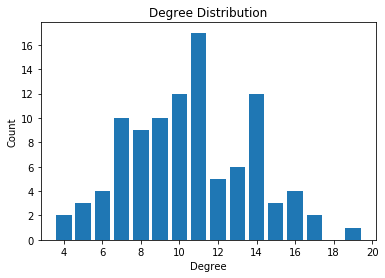

In [7]:
#Visualixing the degree distribution
import collections
#sorting and counting in order to create a histogram

degree_sort = sorted([d for n, d in ER.degree()], reverse=True)
degree_count = collections.Counter(degree_sort)
degree, count = zip(*degree_count.items())

#plotting distribution as histrogram

plt.bar(degree, count)
plt.title("Degree Distribution")
plt.ylabel("Count")
plt.xlabel("Degree")

plt.show()

> **Ex. 9.1.3**: Another very famous type of synthetic network is the Barabási–Albert (BA) network.
1. Describe what a BA network is and how to create one.
2. On the [`NetworkX` documentations site](https://networkx.github.io/documentation/networkx-1.10/reference/generators.html), find a method you can use for generating a BA network. Create one with $N=100$ nodes and number of new edges from each new node $m=2$.
3. Plot the network
4. Visualize the [degree distribution](https://en.wikipedia.org/wiki/Degree_distribution) of your newly created BA graph.
5. Explain the main difference(s) you observe, when comparing to the ER network.
6. Are there other measures we could have used to describe the ER and BA networks further?

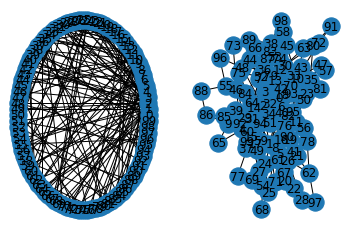

In [8]:
#BA network is another type of random network, but it is a random scale-free network.
from networkx import barabasi_albert_graph

#creating network
BA = barabasi_albert_graph(100, 2)

#plotting the network
plt.subplot(121)
nx.draw_shell(BA, with_labels=True)
plt.subplot(122)
nx.draw(BA, with_labels=True)


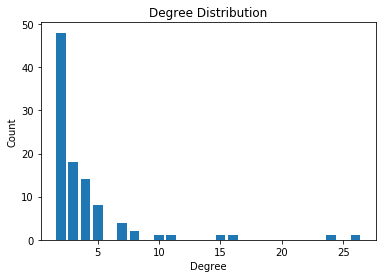

In [9]:

#Visualixing the degree distribution
#sorting and counting in order to create a histogram

degree_sort = sorted([d for n, d in BA.degree()], reverse=True)
degree_count = collections.Counter(degree_sort)
degree, count = zip(*degree_count.items())

#plotting distribution as histrogram

plt.bar(degree, count)
plt.title("Degree Distribution")
plt.ylabel("Count")
plt.xlabel("Degree")

plt.show()

### Part 2: Facebook network

Now that you know how to build a network in `NetworkX`, visualize it and plot some statistics, you are ready to analyze today's dataset. We will be using [this facebook dataset](http://socialnetworks.mpi-sws.org/data-wosn2009.html) collected by the researchers at the Max Planck Institute. Go ahead and download the list of wall posts. Put the file in the same directory as this notebook and load it like:

In [10]:
data = pd.read_csv(
    "facebook-wall.txt.gz",
    delimiter="\t",
    header=None,
    names=['user1', 'user2', 'timestamp']
)

data.head(10)

,user1,user2,timestamp
0,28,28,1095135831
1,1015,1017,1097725406
2,959,959,1098387569
3,991,991,1098425204
4,1015,1017,1098489762
5,1015,1017,1098673897
6,3368,3368,1098755376
7,14752,14736,1099526971
8,1015,1017,1099602800
9,1531,1080,1099889279


As you can see this is a *temporal network* (in that edges are timestamped). Time is given in UNIX timestamps. Though there are ways to model such
a network in its entire complexity, we'll start simple and just take a slice of it out and treat that as a static
network. You can create a `nx.DiGraph` from a slice of time like:

In [11]:
t0 = data.timestamp.max() - 86400 * 7  # Lower bound of time-slice (here: 7 days before last wall post)
t1 = data.timestamp.max()              # Upper bound of time-slice

# Subset of the pandas dataframe
data_t = data.loc[data.timestamp.between(t0, t1)]

# Count the number of times each link occurs and store that in a new 'weight' column
data_t = data_t.groupby(['user1', 'user2']).size().reset_index(name='weight')

# Create a `nx.DiGraph` from this dataframe
G_t = nx.from_pandas_edgelist(data_t, 'user1', 'user2', 'weight', create_using=nx.DiGraph)

> **Ex: 9.2.1**: Convert the above sample code into a function where you can easily input `t0` and `t1` of the slice, and get a `nx.DiGraph` in return. Create the aggregated network for the last 365 days of the data. Print the number of nodes and edges.

In [12]:
#Creating a function that inputs t0 and t1 and get the nx.DiGraph
def directed_graph(t0, t1):
    # Subset of the pandas dataframe
    data_t = data.loc[data.timestamp.between(t0, t1)]
    # Count the number of times each link occurs and store that in a new 'weight' column
    data_t = data_t.groupby(['user1', 'user2']).size().reset_index(name='weight')
    # Create a `nx.DiGraph` from this dataframe
    G_t = nx.from_pandas_edgelist(data_t, 'user1', 'user2', 'weight', create_using=nx.DiGraph)
    return G_t

In [13]:

#creating the time stamps for 365 days from the last post
t0 = data.timestamp.max() - 86400 * 365  # Lower bound of time-slice (here: 7 days before last wall post)
t1 = data.timestamp.max()              # Upper bound of time-slice

In [14]:

G_365 = directed_graph(t0,t1)
print('Number of nodes:', len(G_365.nodes))
print('Number of edges:', len(G_365.edges))

Number of nodes: 44397
Number of edges: 201632


> **Ex: 9.2.2**: Since it's a directed network, there are two degree distributions we can plot: one for the
in-degrees and another for the out-degrees. Plot them both in the same figure (remember to add a legend).
The distribution is very heavy-tailed, so you may want to log-scale both axes. Comment on the result. Does
it resemble any of the network models you know?
>
> *Hint: use `Counter` to count how many times each degree-value occurs and then scatter plot the degree-values
against counts. When you log-scale the axes, zero values cause trouble, so you should remove the data point for
degree 0.*

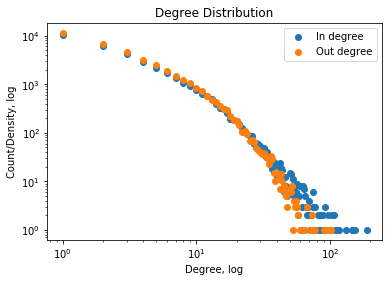

In [15]:
#Visualixing the degree distributions
#sorting and counting in order to create a histogram

in_degree_sort = sorted([d for n, d in G_365.in_degree()], reverse=True)
out_degree_sort = sorted([d for n, d in G_365.out_degree()], reverse=True)
in_degree_count = collections.Counter(in_degree_sort)
out_degree_count = collections.Counter(out_degree_sort)

#removing the datapoints for degree 0
del in_degree_count[0]
del out_degree_count[0]

in_degree, in_count = zip(*in_degree_count.items())
out_degree, out_count = zip(*out_degree_count.items())



#plotting distribution as histrogram

plt.scatter(in_degree, in_count, label='In degree')
plt.scatter(out_degree, out_count, label='Out degree')
plt.title('Degree Distribution')
plt.legend()
plt.xscale('log')
plt.yscale('log')
plt.ylabel('Count/Density, log')
plt.xlabel('Degree, log')

plt.show()

> **Ex: 9.2.3**: Using a histogram plot the distribution of (weighted) local clustering coefficients ([docs](https://networkx.github.io/documentation/stable/reference/algorithms/generated/networkx.algorithms.cluster.clustering.html#networkx.algorithms.cluster.clustering)). Which distribution does it appear to follow?
>
> *Hint: figure out how to plot a histogram with logarithmic bins.*

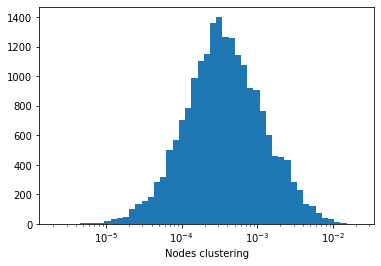

In [16]:
import numpy as np

G_cluster = nx.clustering(G_365, weight='weight')

cluster_min= sorted(set(nx.clustering(G_365, weight='weight').values()))[1]
cluster_max= sorted(set(nx.clustering(G_365, weight='weight').values()))[-1]

logbin = np.logspace(np.log10(cluster_min),np.log10(cluster_max),50)

plt.hist(G_cluster.values(), bins=logbin)
plt.xscale('log')
plt.xlabel('Nodes clustering')
plt.show()


We want to plot the network so we can visually get a feeling for how people are connected. `networkx`'s `nx.draw` method won't cut it here, it's too slow and has bad layout support for large networks, so instead we'll use `netwulf` ([docs](https://netwulf.readthedocs.io/)) to visualize networks in a browser-app I made (still in beta, bugs may occur). But even with this tool, the network of one year is still too big to make nice visualizations, so we have to reduce the number of links and nodes by some heuristic. This could for example be to threshold link weight to reduce the number of links, thresholding weighted node degree (or other relevant metrics).

> **Ex: 9.2.4**: Threshold the network by some meaningful heuristic so it has around 5000 nodes and 20000 edges. Then launch a visualization of it using `netwulf`, style the network so it looks nice and download (or screenshot) the figure and put it into the cell below. State explicitly what thresholds you apply and why you think they make sense. Comment on the result. Do you see anything interesting in this network or is it just a big hairball?
>
> *Hint: The longer you let the nodes **wiggle** the nicer the network will look.*

In [24]:
import netwulf as wulf

wulf.visualize(G_365)

(None, None)